In [20]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [5]:
# Load the dataset from the local path
data_path = r"C:\Users\Admin\Desktop\ML online\week3\dataset\kddcup.data.gz"
column_names = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment",
                "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted",
                "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
                "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
                "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", 
                "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", 
                "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate",
                "dst_host_srv_rerror_rate", "label"]

# Load the dataset into a Pandas DataFrame
data = pd.read_csv(data_path, header=None, names=column_names)
data.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [6]:
# check orignal label
print("Unique labels in the dataset before transformation:")
print(data['label'].unique())

Unique labels in the dataset before transformation:
['normal.' 'buffer_overflow.' 'loadmodule.' 'perl.' 'neptune.' 'smurf.'
 'guess_passwd.' 'pod.' 'teardrop.' 'portsweep.' 'ipsweep.' 'land.'
 'ftp_write.' 'back.' 'imap.' 'satan.' 'phf.' 'nmap.' 'multihop.'
 'warezmaster.' 'warezclient.' 'spy.' 'rootkit.']


In [7]:
# dos_list
dos_labels = ['back', 'land', 'neptune', 'pod', 'smurf', 'teardrop', 'apache2', 'udpstorm', 'processtable', 'worm']

# remov"."
data['label'] = data['label'].str.replace('.', '', regex=False)

# classifay dos adn non-dos
data['label'] = data['label'].apply(lambda x: 'dos' if x in dos_labels else 'non-dos')

# check dis after classifaction
print("Class distribution after relabeling:")
print(data['label'].value_counts())

# Separate features and labels
X = data.drop('label', axis=1)
y = data['label']

# Check category distribution
print("Class distribution before encoding:")
print(y.value_counts())

# Encode the category label
le = LabelEncoder()
y = le.fit_transform(y)  # 0: Non-Dos, 1: Dos

# Check the encoded category distribution
print("Class distribution after encoding:")
print(pd.Series(y).value_counts())


Class distribution after relabeling:
label
dos        3883370
non-dos    1015061
Name: count, dtype: int64
Class distribution before encoding:
label
dos        3883370
non-dos    1015061
Name: count, dtype: int64
Class distribution after encoding:
0    3883370
1    1015061
Name: count, dtype: int64


In [8]:
# Find the categorical characteristics of the data set
categorical_cols = ['protocol_type', 'service', 'flag']  # 这normal feature

# use OneHotEncoder encode features
encoder = OneHotEncoder(sparse_output=False)  # use sparse_output replace sparse
encoded_cols = encoder.fit_transform(data[categorical_cols])

# transfer to DataFrame
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

# Merges the encoded feature with the numerical feature
numeric_cols = data.drop(columns=categorical_cols + ['label'])  # cancel label line
X_encoded = pd.concat([numeric_cols.reset_index(drop=True), encoded_df], axis=1)

# Scale the feature
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)
# confirm
print("Scaled features shape:", X_scaled.shape)
# confirm
X_encoded.head()

Scaled features shape: (4898431, 122)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,215,45076,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,162,4528,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,236,1228,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,233,2032,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,239,486,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# y transfer to Pandas Series
y_series = pd.Series(y)

# check distribution before undersampled
print("Class distribution before resampling:")
print(pd.Series(y).value_counts())

# undersampled
rus = RandomUnderSampler(sampling_strategy={0: 10000, 1: 10000}, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_scaled, y_series)

# check distribution after undersampled
print("Class distribution after resampling:")
print(pd.Series(y_resampled).value_counts())


Class distribution before resampling:
0    3883370
1    1015061
Name: count, dtype: int64
Class distribution after resampling:
0    10000
1    10000
Name: count, dtype: int64


In [11]:
# SVM
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    # Set train and test dataset
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
    
    # training phase
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    
    # test
    y_pred = svm.predict(X_test)
    
    # report
    print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))

Kernel: linear
Accuracy: 0.9995
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2019
           1       1.00      1.00      1.00      1981

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

Kernel: poly
Accuracy: 0.99925
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2019
           1       1.00      1.00      1.00      1981

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

Kernel: rbf
Accuracy: 0.99925
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2019
           1       1.00      1.00      1.00      1981

    accuracy                           1.00      4000
   macro avg       1.00      1.00  

In [13]:
'''
Compare the results for each of the kernels:
Linear Kernel: Accuracy 0.9995, slightly higher than others, nearly perfect classification.
Polynomial Kernel: Accuracy 0.99925, very close to linear and RBF, handles non-linear relationships well.
RBF Kernel: Accuracy 0.99925, performs similarly to polynomial, excellent at capturing complex patterns.
Sigmoid Kernel: Accuracy 0.9905, slightly lower, though still good overall performance.
Pros and Cons of Each Kernel:
Linear Kernel: Pros – Fast, simple, works well on linearly separable data. Cons – Struggles with non-linear patterns.
Polynomial Kernel: Pros – Captures non-linear relationships. Cons – Higher computational cost, potential for overfitting.
RBF Kernel: Pros – Best for complex, non-linear data. Cons – Slower, requires careful tuning (gamma).
Sigmoid Kernel: Pros – Similar to neural network activation. Cons – Often less effective than RBF, harder to tune.
Conclusion:
The linear kernel is efficient and performs well when data is nearly linearly separable, 
while RBF is ideal for complex non-linear problems, offering the best generalization. 
Polynomial performs similarly but at a higher computational cost, and sigmoid tends to underperform compared to the RBF kernel.

'''

'\nCompare the results for each of the kernels:\nLinear Kernel: Accuracy 0.9995, slightly higher than others, nearly perfect classification.\nPolynomial Kernel: Accuracy 0.99925, very close to linear and RBF, handles non-linear relationships well.\nRBF Kernel: Accuracy 0.99925, performs similarly to polynomial, excellent at capturing complex patterns.\nSigmoid Kernel: Accuracy 0.9905, slightly lower, though still good overall performance.\nPros and Cons of Each Kernel:\nLinear Kernel: Pros – Fast, simple, works well on linearly separable data. Cons – Struggles with non-linear patterns.\nPolynomial Kernel: Pros – Captures non-linear relationships. Cons – Higher computational cost, potential for overfitting.\nRBF Kernel: Pros – Best for complex, non-linear data. Cons – Slower, requires careful tuning (gamma).\nSigmoid Kernel: Pros – Similar to neural network activation. Cons – Often less effective than RBF, harder to tune.\nConclusion:\nThe linear kernel is efficient and performs well wh

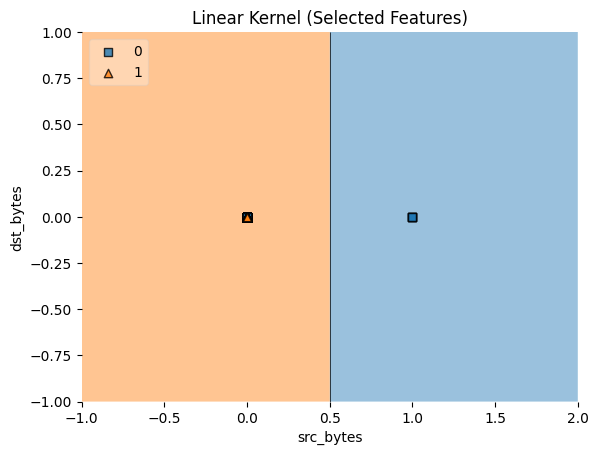

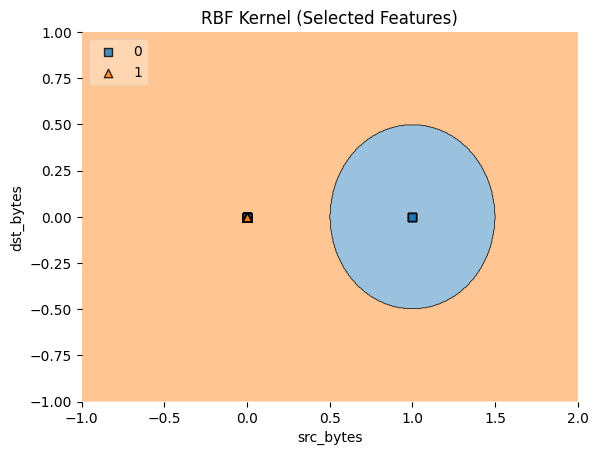

In [27]:
X_two_features_resampled = X_resampled[:, [4, 5]]  

scaler = MinMaxScaler()
X_two_scaled = scaler.fit_transform(X_two_features_resampled)

# set train and test
X_subsample, _, y_subsample, _ = train_test_split(X_two_scaled, y_resampled, train_size=15000, random_state=42, stratify=y_resampled)

# y_subsample transfer to NumPy 
y_subsample = y_subsample.to_numpy()  # 如果 y_subsample 是 Pandas Series

# training linear
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_subsample, y_subsample)

#  mlxtend  linear
plot_decision_regions(X_subsample, y_subsample, clf=svm_linear, legend=2)
plt.title("Linear Kernel (Selected Features)")
plt.xlabel('src_bytes')  
plt.ylabel('dst_bytes')  
plt.show()

# training RBF
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_subsample, y_subsample)

#  mlxtend  RBF 
plot_decision_regions(X_subsample, y_subsample, clf=svm_rbf, legend=2)
plt.title("RBF Kernel (Selected Features)")
plt.xlabel('src_bytes')
plt.ylabel('dst_bytes')
plt.show()

In [ ]:
Analysis of Experimental Results in the Plots:
You selected two features, src_bytes and dst_bytes, and trained SVM models using both linear and RBF kernels. 
The decision boundaries for each kernel were visualized in the plots. Here’s an analysis of the results for each kernel.

1. Linear Kernel:
Decision Boundary: In the plot, the decision boundary is a vertical line that separates the two classes (0 and 1). 
The orange region on the left represents class 1, and the blue region on the right represents class 0.
Observations:
Linear Separability: The decision boundary shows that the features src_bytes and dst_bytes are linearly separable, 
as a simple straight line can separate the two classes.
Classification Performance: Despite having relatively few and concentrated data points, the linear kernel effectively classifies the data.
Applicability: The linear kernel works well in this simple feature space where the data is easily separable. 
For this subset, the linear boundary is sufficient.
2. RBF Kernel (Radial Basis Function):
Decision Boundary: In the RBF kernel plot, the decision boundary forms a circular region around class 0. 
The blue area inside the circle represents class 0, while the orange area outside represents class 1.
Observations:
Non-Linear Decision Boundary: Unlike the linear kernel, the RBF kernel produces a non-linear decision boundary, 
which captures more complex classification patterns. In this case, class 0 is enclosed by the circular boundary, 
showing the RBF kernel’s ability to handle local patterns.
Applicability: The RBF kernel is well-suited for complex, non-linearly separable data. Even with this small subset of data, 
the RBF kernel captures more intricate relationships between the features.

Comparison and Discussion:
Linear Kernel: The linear kernel is ideal for linearly separable data, where a simple straight-line boundary is sufficient. 
In this experiment, it performed well and quickly separated the classes. It is fast and effective for features that follow a linear pattern.

RBF Kernel: The RBF kernel is designed for more complex, non-linear data. In this example, it generated a circular decision boundary, 
which indicates it can handle more complex patterns between features. RBF kernels are powerful for non-linear classification, 
though they come with increased computational costs and require tuning parameters like gamma.

Key Takeaways:
Both kernels effectively classify the data with these two features. The linear kernel is simpler and faster, 
making it ideal for linearly separable data. On the other hand, the RBF kernel provides a more flexible boundary, making it useful for more complex data distributions where the separation isn't linear.
In cases where data distributions are more complicated or non-linear, the RBF kernel is often a better choice, although it requires careful parameter tuning. For simpler, more straightforward patterns, the linear kernel is more efficient and provides quicker results.
If you have a more complex dataset or additional features, you might explore further feature engineering or try hyperparameter tuning for the RBF kernel to see if it can improve classification performance.